In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import linalg
from numpy.polynomial import Polynomial

In [2]:
# Importing train dataset
dataset = pd.read_table('Dados-medicos.txt')

In [3]:
X = dataset.values[:,2]
y = dataset.values[:,3]

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def X_matrix(data, d):
    X = []
    for i in range(len(data)):
        a = [1.0]
        for j in range(1,d):
            a.append(data[i]**j)
        X.append(a)
    return X
    
def X_matrix2(data, d):
    X = []
    for i in range(len(data)):
        a = [1.0]
        for j in range(1,d):
            for p in range(len(data[i])):
                a.append(data[i][p]**j)
        X.append(a)
    return X

def coefs(b):
    n = []
    for i in range(len(b)):
        n.append(b[i][0])
    return n
        
def plot(poly, X, y):
    dataset_X_bound = [min(X), max(X)]
    dataset_y_bound = [min(y), max(y)]
    poly_points = poly.linspace(1000, [dataset_X_bound[0] - 0.1, dataset_X_bound[1] + 0.1])
    plt.plot(X, y, 'o', label='Data', color='white', fillstyle='full', markeredgecolor='black')
    plt.plot(poly_points[0], poly_points[1], color='green')
    plt.legend()
    plt.axis((dataset_X_bound[0] - 0.1, dataset_X_bound[1] + 0.1, dataset_y_bound[0] - 0.1, dataset_y_bound[1] + 0.1))
    plt.show()

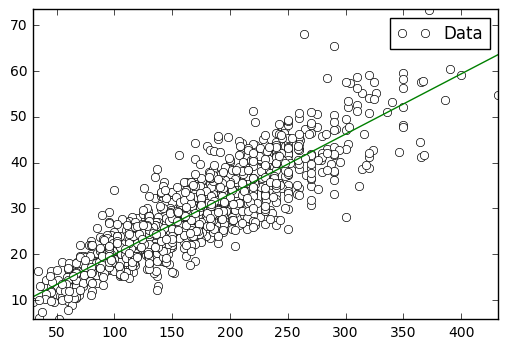

Parametros d=2,  [[ 6.79691168]
 [ 0.13142807]]
NLL (in sample): 12745.37
NLL (out sample): 2000.89
Mean squared error (in sample): 25.49
Mean squared error (out sample): 23.27


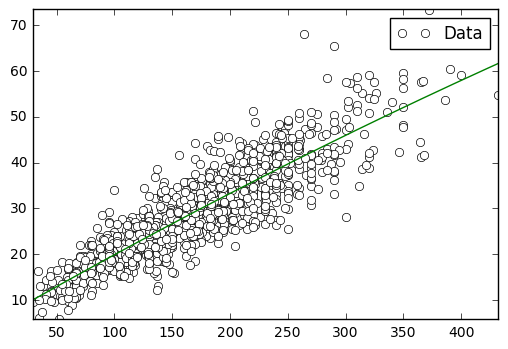

Parametros d=3,  [[  5.78288014e+00]
 [  1.44306857e-01]
 [ -3.47680736e-05]]
NLL (in sample): 12719.02
NLL (out sample): 2007.08
Mean squared error (in sample): 25.44
Mean squared error (out sample): 23.34


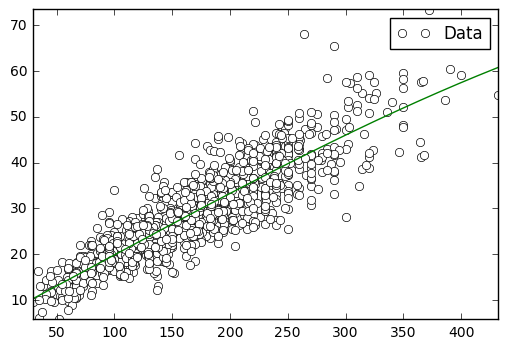

Parametros d=4,  [[  6.29133893e+00]
 [  1.34012370e-01]
 [  2.35571766e-05]
 [ -9.68424979e-08]]
NLL (in sample): 12716.90
NLL (out sample): 2009.12
Mean squared error (in sample): 25.43
Mean squared error (out sample): 23.36


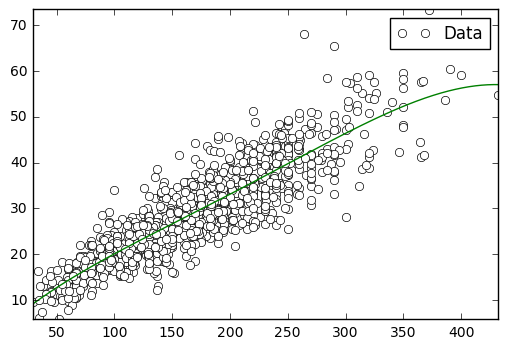

Parametros d=5,  [[  3.19582263e+00]
 [  2.21301322e-01]
 [ -7.58426105e-04]
 [  2.64940090e-06]
 [ -3.26845641e-09]]
NLL (in sample): 12690.29
NLL (out sample): 2021.57
Mean squared error (in sample): 25.38
Mean squared error (out sample): 23.51


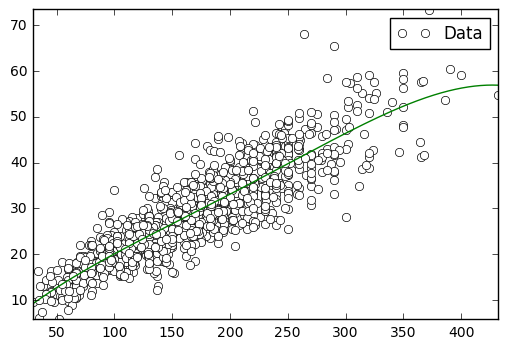

Parametros d=6,  [[  3.38255668e+00]
 [  2.14513947e-01]
 [ -6.73746446e-04]
 [  2.18144963e-06]
 [ -2.09675583e-09]
 [ -1.08118469e-12]]
NLL (in sample): 12690.26
NLL (out sample): 2021.49
Mean squared error (in sample): 25.38
Mean squared error (out sample): 23.51


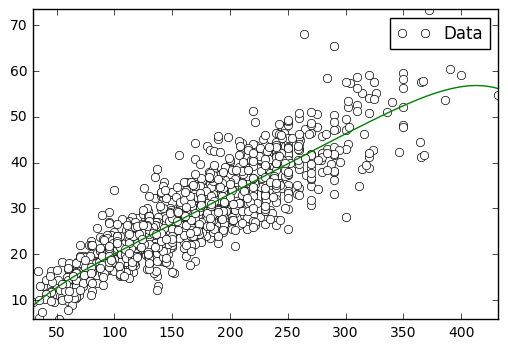

Parametros d=7,  [[  9.32915254e-01]
 [  3.25016774e-01]
 [ -2.47797614e-03]
 [  1.61633050e-05]
 [ -5.74174137e-08]
 [  1.06508630e-10]
 [ -8.13278052e-14]]
NLL (in sample): 12688.18
NLL (out sample): 2017.37
Mean squared error (in sample): 25.38
Mean squared error (out sample): 23.46


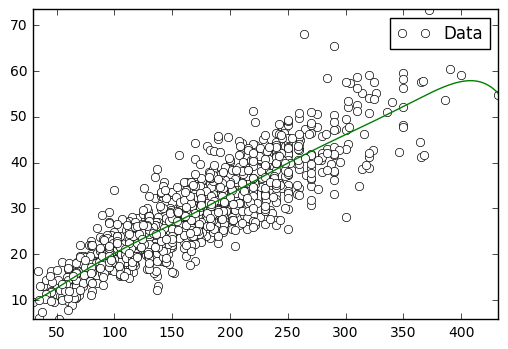

Parametros d=8,  [[  9.25669523e+00]
 [ -1.26621916e-01]
 [  6.74781629e-03]
 [ -7.75763229e-05]
 [  4.63032804e-07]
 [ -1.49450143e-09]
 [  2.47352528e-12]
 [ -1.64623686e-15]]
NLL (in sample): 12679.78
NLL (out sample): 2011.94
Mean squared error (in sample): 25.36
Mean squared error (out sample): 23.39


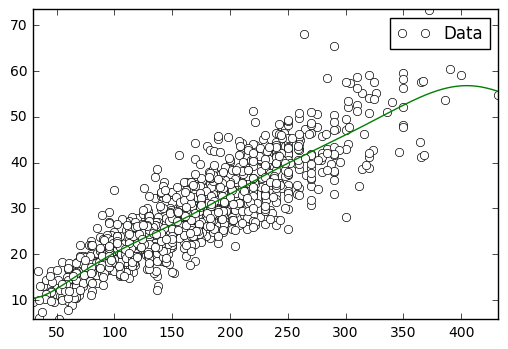

Parametros d=9,  [[  1.83569538e+01]
 [ -7.06009787e-01]
 [  2.10719294e-02]
 [ -2.59941158e-04]
 [  1.78968726e-06]
 [ -7.21130557e-09]
 [  1.68697041e-11]
 [ -2.11792306e-14]
 [  1.10092871e-17]]
NLL (in sample): 12676.40
NLL (out sample): 2016.94
Mean squared error (in sample): 25.35
Mean squared error (out sample): 23.45


In [4]:
# questao 1.1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=172, random_state=0)

# questao 1.1
for d in range(2,10):
    X = np.matrix(X_matrix(X_train, d))
    X_t = np.matrix(X_matrix(X_test, d))
    y = (np.matrix(y_train)).transpose()
    b = linalg.inv(X.transpose() * X) * X.transpose() * y
    
    p = np.array(b)
    plot(Polynomial(coefs(p)), X_train, y_train)
    nll_in = 0.5 * (y - X * b).transpose() * (y - X * b) 
    nll_out = 0.5 * ((np.matrix(y_test)).transpose() - X_t * b).transpose() * ((np.matrix(y_test)).transpose() - X_t * b) 
    print('Parametros d='+ str(d) +', ', p)
    print("NLL (in sample): %.2f" % nll_in)
    print("NLL (out sample): %.2f" % nll_out)
    print("Mean squared error (in sample): %.2f"
          % mean_squared_error(y_train, X*b))
    print("Mean squared error (out sample): %.2f"
          % mean_squared_error(y_test, X_t * b))

In [5]:
# questao 1.2
X = dataset.values[:,1:3]
y = dataset.values[:,3]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=172, random_state=0)

print('\n')
print('peso, carga -> 1 + peso + carga + peso^2 + carga^2...')
for d in range(2,10):
    X = np.matrix(X_matrix2(X_train, d))
    X_t = np.matrix(X_matrix2(X_test, d))
    y = (np.matrix(y_train)).transpose()
    b = linalg.inv(X.transpose() * X) * X.transpose() * y
    p = np.array(b)
    nll_in = 0.5 * (y - X * b).transpose() * (y - X * b) 
    nll_out = 0.5 * ((np.matrix(y_test)).transpose() - X_t * b).transpose() * ((np.matrix(y_test)).transpose() - X_t * b) 
    print('\n')
    print('Parametros d='+ str(d) +', ', p)
    print("NLL (in sample): %.2f" % nll_in)
    print("NLL (out sample): %.2f" % nll_out)
    print("Mean squared error (in sample): %.2f"
          % mean_squared_error(y_train, X*b))
    print("Mean squared error (out sample): %.2f"
      % mean_squared_error(y_test, X_t * b))
    
####################



peso, carga -> 1 + peso + carga + peso^2 + carga^2...


Parametros d=2,  [[ 26.1454974 ]
 [ -0.24479517]
 [  0.14130521]]
NLL (in sample): 6283.29
NLL (out sample): 823.18
Mean squared error (in sample): 12.57
Mean squared error (out sample): 9.57


Parametros d=3,  [[  3.87598608e+01]
 [ -5.99894270e-01]
 [  1.88421667e-01]
 [  1.84178718e-03]
 [ -1.22008684e-04]]
NLL (in sample): 5701.47
NLL (out sample): 734.16
Mean squared error (in sample): 11.40
Mean squared error (out sample): 8.54


Parametros d=4,  [[  2.21068277e+01]
 [ -8.13539380e-02]
 [  1.92972421e-01]
 [ -3.38410032e-03]
 [ -1.53254561e-04]
 [  1.68200262e-05]
 [  5.74857378e-08]]
NLL (in sample): 5661.64
NLL (out sample): 740.46
Mean squared error (in sample): 11.32
Mean squared error (out sample): 8.61


Parametros d=5,  [[ -3.79453519e+01]
 [  2.32875126e+00]
 [  2.79514764e-01]
 [ -4.00727955e-02]
 [ -9.58056374e-04]
 [  2.55090891e-04]
 [  2.95814838e-06]
 [ -5.55137971e-07]
 [ -3.51677132e-09]]
NLL (in sample): 5

In [6]:
# questao 1.3

X = dataset.values[:,:3]
y = dataset.values[:,3]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=172, random_state=0)

print('\n')
print('idade, peso, carga -> 1 + idade + peso + carga + idade^2 + peso^2 + ...')
for d in range(2,10):
    X = np.matrix(X_matrix2(X_train, d))
    X_t = np.matrix(X_matrix2(X_test, d))
    y = (np.matrix(y_train)).transpose()
    b = linalg.inv(X.transpose() * X) * X.transpose() * y
    p = np.array(b)
    nll_in = 0.5 * (y - X * b).transpose() * (y - X * b) 
    nll_out = 0.5 * ((np.matrix(y_test)).transpose() - X_t * b).transpose() * ((np.matrix(y_test)).transpose() - X_t * b) 
    print('\n')
    print('Parametros d='+ str(d) +', ', p)
    print("NLL (in sample): %.2f" % nll_in)
    print("NLL (out sample): %.2f" % nll_out)
    print("Mean squared error (in sample): %.2f"
          % mean_squared_error(y_train, X*b))
    print("Mean squared error (out sample): %.2f"
      % mean_squared_error(y_test, X_t * b))



idade, peso, carga -> 1 + idade + peso + carga + idade^2 + peso^2 + ...


Parametros d=2,  [[ 29.47511397]
 [ -0.04181291]
 [ -0.24560573]
 [  0.1353058 ]]
NLL (in sample): 6182.43
NLL (out sample): 825.48
Mean squared error (in sample): 12.36
Mean squared error (out sample): 9.60


Parametros d=3,  [[  4.03953244e+01]
 [ -8.35732405e-02]
 [ -5.89192161e-01]
 [  1.89589166e-01]
 [  7.29630297e-04]
 [  1.79219511e-03]
 [ -1.26565944e-04]]
NLL (in sample): 5679.68
NLL (out sample): 734.50
Mean squared error (in sample): 11.36
Mean squared error (out sample): 8.54


Parametros d=4,  [[  3.24706923e+01]
 [ -5.86274820e-01]
 [ -9.37646291e-02]
 [  1.88428111e-01]
 [  1.08582261e-02]
 [ -3.22413245e-03]
 [ -1.29568502e-04]
 [ -6.36456026e-05]
 [  1.62320209e-05]
 [  2.27987489e-08]]
NLL (in sample): 5589.85
NLL (out sample): 728.20
Mean squared error (in sample): 11.18
Mean squared error (out sample): 8.47


Parametros d=5,  [[ -3.15831681e+01]
 [ -9.25406515e-02]
 [  2.25194945e+00]
 [  2

In [7]:
##########################

def AmericanCollegeSports(data):
    a = []
    for i in range(len(data)):
        a.append((data[i][1] * 11.4 + 260 + data[i][0] * 3.5)/ data[i][0])
    return a
    

# questao 1.4
X = dataset.values[:,1:3]
y = dataset.values[:,3]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=172, random_state=0)

print('\n')
print('peso, carga -> 1 + peso^-1 + carga*peso^-1')

X_n = []
for i in range(len(X_train)):
    a = [1.0, X_train[i][0]**(-1), X_train[i][1]*X_train[i][0]**(-1)]
    X_n.append(a)
X = X_n

X_n = []
for i in range(len(X_test)):
    a = [1.0, X_test[i][0]**(-1), X_test[i][1]*X_test[i][0]**(-1)]
    X_n.append(a)
X_t = X_n

X = np.matrix(X)
X_t = np.matrix(X_t)
y = (np.matrix(y_train)).transpose()
b = linalg.inv(X.transpose() * X) * X.transpose() * y
p = np.array(b)
nll_in = 0.5 * (y - X * b).transpose() * (y - X * b) 
nll_out = 0.5 * ((np.matrix(y_test)).transpose() - X_t * b).transpose() * ((np.matrix(y_test)).transpose() - X_t * b) 
print('\n')
print('Parametros', p)
print("NLL (in sample): %.2f" % nll_in)
print("NLL (out sample): %.2f" % nll_out)
print("Mean squared error (in sample): %.2f"
      % mean_squared_error(y_train, X*b))
print("Mean squared error (out sample): %.2f"
  % mean_squared_error(y_test, X_t * b))


print('\n')
print('Parametros American College of Sports')
print("Mean squared error (in sample): %.2f"
      % mean_squared_error(y_train, AmericanCollegeSports(X_train)))
print("Mean squared error (out sample): %.2f"
  % mean_squared_error(y_test, AmericanCollegeSports(X_test)))



peso, carga -> 1 + peso^-1 + carga*peso^-1


Parametros [[  5.05678375]
 [ 32.33654956]
 [ 11.82800076]]
NLL (in sample): 4927.73
NLL (out sample): 755.30
Mean squared error (in sample): 9.86
Mean squared error (out sample): 8.78


Parametros American College of Sports
Mean squared error (in sample): 10.23
Mean squared error (out sample): 9.27
